<h1>Modeling Bee's Waggle Dance</h1>

<h2> Imports and initial parameters </h2>

In [41]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functions import takeupper,takelower,takemean
from scipy.optimize import curve_fit
from scipy.stats import spearmanr

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({
"text.usetex": True,
"font.family": "sans-serif",
"font.sans-serif": ["Helvetica"]})

<h2>Variables and reading data</h2>

In [42]:
#Importing data
arr         = np.genfromtxt('peerj-09-11187-s001.csv', dtype=float, delimiter=';',skip_header=1)

# Assigning table data to lists
distances   = arr[:,1]
t_waggles   = arr[:,3]
t_circuits  = arr[:,5]
t_returns   = arr[:,7]

# Calculating mean data
dist_mean, t_wag_mean   = takemean(distances, t_waggles)
dist_mean, t_ret_mean   = takemean(distances, t_returns)

# Turning lists into numpy lists
dist_mean   = np.array(dist_mean)
t_wag_mean  = np.array(t_wag_mean)
t_ret_mean  = np.array(t_ret_mean)

<h2> Defining Functions </h2>

In [43]:
def nonlinearf(x, a, b, c):
    return a + (b/c) * (1 - np.exp(-c*x))

def nonlinearwag(x, a, b):
    return (a/b) * (1 - np.exp(-b*x))

def linwag(x, a, b):
    return a + b * x

def logistic(x, a, b, c):
    return (b/a)/(1+c*np.exp(-b*x))

def difflogist(x, a, b, c):
    return (b**2*c*np.exp(b*x))/(a*(np.exp(b*x)+c)**2)

def profitfunc(x,b,c,m=2):
    return 2/(np.log(1-x/((b/c)))/-c)

def profbylog(x,a,b,c):
    return np.log((((b/(a*x)))-1)/c)/-b

def diffprofbylog(x,a,b,c):
    return 1/(x*(b-a*x))

<h2> Fitting Functions on Dataset </h2>

In [44]:
# Fitting Frisch model onto waggle phase durations
nonlinf_param, pcovf            = curve_fit(nonlinearf, distances, t_waggles)

# Fitting Frisch model onto mean waggle phase durations
nonlinf_param_mean, pcovfm      = curve_fit(nonlinearf, dist_mean, t_wag_mean)

# Fitting non linear model onto waggle phase durations
nonlinwag_param, pcovwag        = curve_fit(nonlinearwag, distances, t_waggles)

# Fitting non linear model onto mean waggle phase durations
nonlinwag_param_mean, pcovwagm  = curve_fit(nonlinearwag, dist_mean, t_wag_mean)

# Fitting linear model onto return phase durations
linret_param, pcovret           = curve_fit(linwag, distances, t_returns)

# Fitting linear model onto mean return phase durations
linret_param_mean, pcovretm          = curve_fit(linwag, dist_mean, t_ret_mean)

<h3> Parameters for Models </h3>

In [45]:
# Quality parameter for the graphs
# Higher values equal more datapoints
quality = 3

# Making a linear space that spans the range of the distances
dist_space      = np.linspace(np.min(distances), np.max(distances), len(distances))
dist_mean_space = np.linspace(np.min(dist_mean), np.max(dist_mean), len(dist_mean))
qual_dist       = np.linspace(np.min(distances), np.max(distances), len(distances)*quality)
qual_dist_mean  = np.linspace(np.min(dist_mean), np.max(dist_mean), len(dist_mean)*quality)

<H2> Frisch & Kohl Waggle Phase Model </H2>

In [46]:
# Fit function on the linear space
frisch_fit      = nonlinearf(dist_space, *nonlinf_param)
frisch_fit_mean = nonlinearf(dist_mean_space, *nonlinf_param_mean)

# Getting the residuals
pred_wag            = nonlinearf(distances, *nonlinf_param)
residuals_frisch    = frisch_fit - pred_wag

# Getting the mean residuals
pred_wag_mean           = nonlinearf(dist_mean, *nonlinf_param_mean)
residuals_frisch_mean   = frisch_fit_mean - pred_wag_mean

# Finding the pearson's r for the data sets and function values
r_frisch        = spearmanr(frisch_fit, t_waggles)
r_frisch_mean   = spearmanr(frisch_fit_mean, t_wag_mean)

# Printing results
print("Residuals: \n", residuals_frisch, "\nMean Residuals: \n", residuals_frisch_mean)
print("Parameters: \n", *nonlinf_param, "\nMean Parameters: \n", *nonlinf_param_mean)
print("Spearman's R: \n", r_frisch[0], " Mean: ", r_frisch_mean[0])

Residuals: 
 [ 0.          0.05392345  0.10680342  0.15866008  0.20951325 -0.09091817
 -0.04201411  0.00594359  0.05297324  0.0990928   0.14431989 -0.117592
 -0.07409839 -0.03144644  0.01038015  0.05139733 -0.17614219 -0.13669713
 -0.09801538 -0.06008217 -0.02288303  0.01359627  0.04936964 -0.14965139
 -0.11524915 -0.08151264 -0.04842897 -0.01598553 -0.18884275 -0.1576428
 -0.12704661 -0.0970425  -0.06761901 -0.0387649  -0.18941232 -0.16166414
 -0.13445292 -0.10776828 -0.08160002 -0.05593816 -0.03077288 -0.16254257
 -0.13834184 -0.11460942 -0.09133626 -0.06851346 -0.04613232 -0.02418428
 -0.00266096 -0.11833485 -0.09763649 -0.07733867 -0.05743363 -0.03791379
 -0.01877168  0.        ] 
Mean Residuals: 
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.22044605e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
Parameters: 
 0.19934032395287365 2.0018399749639952 0.6717231855399498 
Mean Parameters: 
 0.20127575422134084 1.9915005512347592 0.6635432

<h3> Plotting Frisch Model</h3>

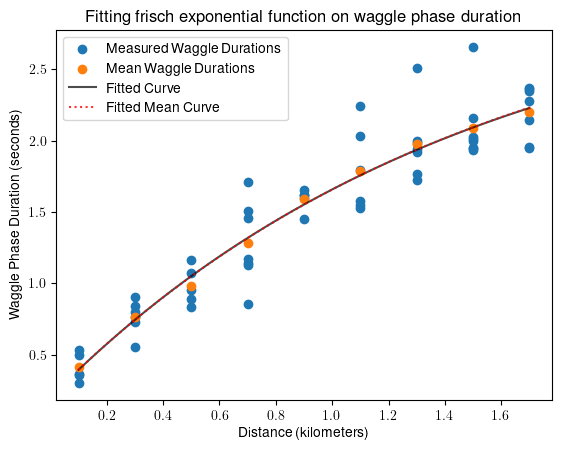

In [47]:
# Adding more datapoints for graph
frisch_fit_qual         = nonlinearf(qual_dist, *nonlinf_param)
frisch_fit_mean_qual    = nonlinearf(qual_dist_mean, *nonlinf_param_mean)

# Making the plot object
ax = plt.axes()

# Adding data points 
ax.scatter(distances, t_waggles, label='Measured Waggle Durations')
ax.scatter(dist_mean,t_wag_mean, label="Mean Waggle Durations")

# Plotting fits
ax.plot(qual_dist, frisch_fit_qual, 'k-', alpha=0.7, label='Fitted Curve')
ax.plot(qual_dist_mean, frisch_fit_mean_qual, 'r:', alpha=0.8, label='Fitted Mean Curve')

# Formatting
ax.set_title(r'Fitting frisch exponential function on waggle phase duration')
ax.set_ylabel('Waggle Phase Duration (seconds)')
ax.set_xlabel('Distance (kilometers)')
ax.legend()

plt.show()

<h3> Alternative without initial value </h3>

In [48]:
# Make a data set x and fit function values to it
wag_fit         = nonlinearwag(dist_space, *nonlinwag_param)
wag_fit_mean    = nonlinearwag(dist_mean_space, *nonlinwag_param_mean)

# Getting the residuals
pred_wag        = nonlinearwag(distances, *nonlinwag_param)
residuals_wag   = wag_fit - pred_wag

# Getting the mean residuals
pred_wag_mean       = nonlinearwag(dist_mean, *nonlinwag_param_mean)
residuals_wag_mean  = wag_fit_mean - pred_wag_mean

# Finding the pearson's r for the data set and function values
r_wag       = spearmanr(wag_fit, t_waggles)
r_wag_mean  = spearmanr(wag_fit_mean, t_wag_mean)

# Printing results
print("Residuals: \n", residuals_wag, "\nMean Residuals: \n", residuals_wag_mean)
print("Parameters: \n", *nonlinwag_param, "\nMean Parameters: \n", *nonlinwag_param_mean)
print("Spearman's R: \n", r_wag[0], " Mean: ", r_wag_mean[0])

Residuals: 
 [ 0.          0.06876369  0.13560972  0.20059157  0.26376122 -0.11056177
 -0.0508663   0.00716439  0.06357675  0.1184159   0.17172571 -0.13518222
 -0.08480433 -0.03583136  0.01177587  0.05805544 -0.19229372 -0.14855942
 -0.10604477 -0.06471575 -0.02453931  0.01451671  0.05248354 -0.15375604
 -0.11787729 -0.08299912 -0.04909362 -0.01613367 -0.18427281 -0.15312558
 -0.12284697 -0.09341277 -0.06479941 -0.03698402 -0.17474958 -0.14846396
 -0.1229114  -0.09807143 -0.0739242  -0.05045037 -0.02763118 -0.14113015
 -0.11956596 -0.09860314 -0.07822493 -0.05841502 -0.03915757 -0.02043716
 -0.00223881 -0.09625284 -0.07905537 -0.06233749 -0.04608584 -0.03028741
 -0.01492956  0.        ] 
Mean Residuals: 
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
Parameters: 
 2.6421284418385027 0.9722606044262098 
Mean Parameters: 
 2.6526136444128676 0.9802691823834951
Spearman's R: 
 0.915941830

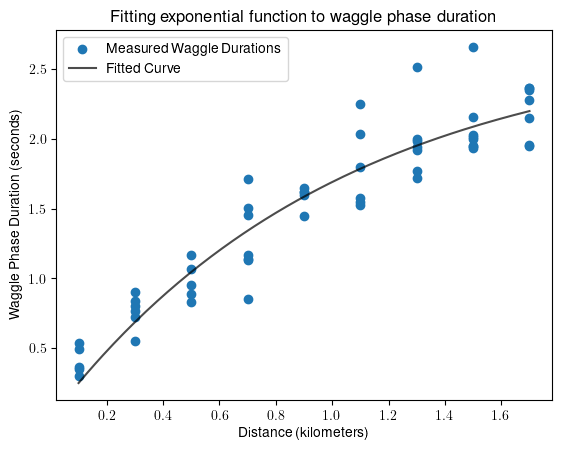

In [49]:
# Adding more datapoints for graph
fit_wag_qual      = nonlinearwag(qual_dist, *nonlinwag_param)
fit_wag_mean_qual = nonlinearwag(qual_dist_mean, *nonlinwag_param_mean)

# Making the plot object
ax = plt.axes()

# Adding data points
ax.scatter(distances, t_waggles, label='Measured Waggle Durations')
#ax.scatter(dist_mean, t_wag_mean, label='Mean Waggle Durations')

# Plotting fits
ax.plot(qual_dist, fit_wag_qual, 'k-', alpha=0.7, label='Fitted Curve')
#ax.plot(qual_dist_mean, fit_wag_mean_qual, 'k-', alpha=0.8, label='Fitted Curve')

# Formatting
ax.set_title(r'Fitting exponential function to waggle phase duration')
ax.set_ylabel('Waggle Phase Duration (seconds)')
ax.set_xlabel('Distance (kilometers)')
ax.legend()

plt.show()

<h3>Plotting the Return Phase</h3>

In [50]:
# Make a data set x and fit function values to it
fit_ret = linwag(dist_space, *linret_param)
fit_ret_mean = linwag(dist_mean_space, *linret_param_mean)

# Getting the residuals
pred_ret = linwag(distances, *linret_param)
residuals_ret = fit_ret - pred_ret

# Getting the mean residuals
pred_ret_mean = linwag(dist_mean, *linret_param_mean)
residuals_ret_mean = fit_ret_mean - pred_ret_mean

# Finding the pearson's r for the data set and function values
#stat1 = pearsonr(results1,results2)
r_ret = spearmanr(fit_ret, t_returns)
r_ret_mean = spearmanr(fit_ret_mean, t_ret_mean)

print("Residuals: \n", residuals_ret, "\nMean Residuals: \n", residuals_ret_mean)
print("Parameters: \n", *linret_param, "\nMean Parameters: \n", *linret_param_mean)
print("Spearman's R: \n", r_ret[0], " Mean: ", r_ret_mean[0])

Residuals: 
 [ 0.          0.01523809  0.03047618  0.04571428  0.06095237 -0.02857142
 -0.01333333  0.00190476  0.01714285  0.03238095  0.04761904 -0.04190475
 -0.02666666 -0.01142857  0.00380952  0.01904762 -0.07047618 -0.05523808
 -0.03999999 -0.0247619  -0.00952381  0.00571428  0.02095238 -0.06857141
 -0.05333332 -0.03809523 -0.02285714 -0.00761905 -0.09714284 -0.08190474
 -0.06666665 -0.05142856 -0.03619047 -0.02095238 -0.11047617 -0.09523808
 -0.07999998 -0.06476189 -0.0495238  -0.03428571 -0.01904762 -0.10857141
 -0.09333331 -0.07809522 -0.06285713 -0.04761904 -0.03238095 -0.01714285
 -0.00190476 -0.09142855 -0.07619046 -0.06095237 -0.04571428 -0.03047618
 -0.01523809  0.        ] 
Mean Residuals: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Parameters: 
 1.3712330995234443 0.5238094131354484 
Mean Parameters: 
 1.3543445092109054 0.5379623027706077
Spearman's R: 
 0.6270937439615464  Mean:  0.8666666666666667


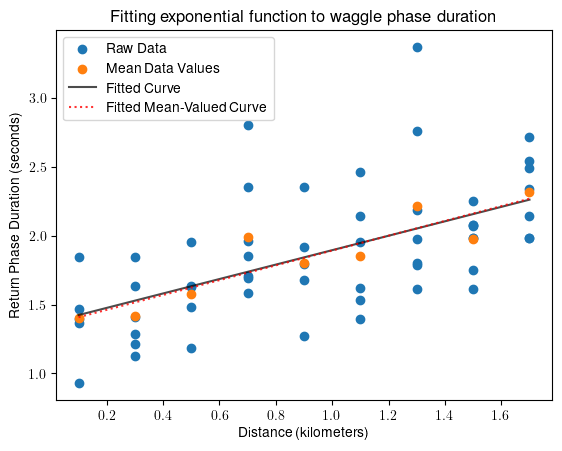

In [51]:
# Adding more datapoints for graph
fit_ret_qual      = linwag(qual_dist, *linret_param)
fit_ret_mean_qual = linwag(qual_dist_mean, *linret_param_mean)

# Defining the plot object
ax = plt.axes()

# Adding data points
ax.scatter(distances, t_returns, label='Raw Data')
ax.scatter(dist_mean, t_ret_mean, label='Mean Data Values')

# Plotting fits
ax.plot(qual_dist, fit_ret_qual, 'k-', alpha=0.7, label='Fitted Curve')
ax.plot(qual_dist_mean, fit_ret_mean_qual, 'r:', alpha=0.8, label='Fitted Mean-Valued Curve')

# Formatting
ax.set_title(r'Fitting exponential function to waggle phase duration')
ax.set_ylabel('Return Phase Duration (seconds)')
ax.set_xlabel('Distance (kilometers)')
ax.legend()

plt.show()

<h3> finding the difference between waggle phase models </h3>

In [52]:
print(r_frisch[0]-r_wag[0])
print(r_frisch[1]-r_wag[1])


0.0
0.0


<h2> Making the profitability model </h2>

In [53]:
# Calculating profitabilities
profit_dist         = 2/distances                                   # Profitability with constant distance
profit_model        = profitfunc(t_waggles, *nonlinwag_param)     # Profitability with distance function
profit_dist_mean    = 2/dist_mean                                   # Profitability with constant distance
profit_model_mean   = profitfunc(t_wag_mean, *nonlinwag_param_mean)    # Profitability with distance function

# Making new linear spaces
prof_space      = np.linspace(np.min(profit_model), np.max(profit_model), len(profit_model))
prof_mean_space = np.linspace(np.min(profit_model_mean), np.max(profit_model_mean), len(profit_model_mean))
qual_prof       = np.linspace(np.min(profit_model), np.max(profit_model), len(profit_model)*quality)
qual_prof_mean  = np.linspace(np.min(profit_model_mean), np.max(profit_model_mean), len(profit_model_mean)*quality)

# Calculating spearman's R value
r_profit_dist           = spearmanr(profit_dist, t_returns)
r_profit_model          = spearmanr(profit_model, t_returns)
r_profit_dist_mean      = spearmanr(profit_dist_mean, t_ret_mean)
r_profit_model_mean     = spearmanr(profit_model_mean, t_ret_mean)
r_profit_means          = spearmanr(profit_model_mean, profit_dist_mean)
print(r_profit_means[0])

# Printing data
print("Spearman on dataset: \nprofit-dist: ", r_profit_dist[0], "\nprofit-model: ", r_profit_model[0], "\nprofit-dist-mean: ", r_profit_dist_mean[0], "\nprofit-model-mean: ", r_profit_model_mean[0])

1.0
Spearman on dataset: 
profit-dist:  -0.6419976608262621 
profit-model:  -0.596937129185762 
profit-dist-mean:  -0.8666666666666667 
profit-model-mean:  -0.8666666666666667


<h2> Plotting the profitability model </h2>

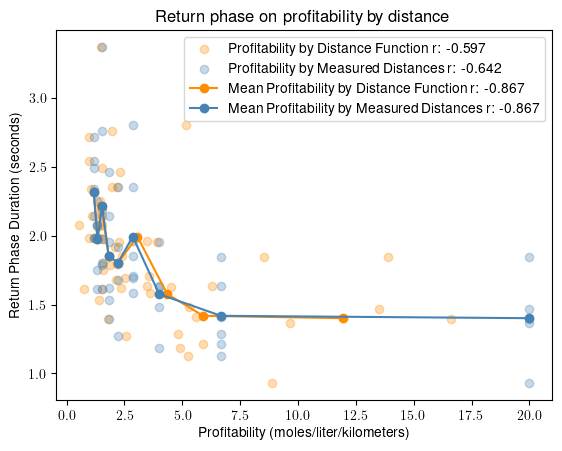

In [54]:
# Plot
ax = plt.axes()

# Plotting raw data points
ax.scatter(profit_model, t_returns, c='darkorange', marker='o', alpha = 0.3, label='Profitability by Distance Function r: ' + str(round(r_profit_model[0],3)))
ax.scatter(profit_dist,       t_returns, c='steelblue', marker='o', alpha = 0.3, label='Profitability by Measured Distances r: ' + str(round(r_profit_dist[0],3)))
ax.plot(profit_model_mean, t_ret_mean, c='darkorange', marker='o', label='Mean Profitability by Distance Function r: ' + str(round(r_profit_model_mean[0],3)))
ax.plot(profit_dist_mean,     t_ret_mean, c='steelblue', marker='o', label='Mean Profitability by Measured Distances r: ' + str(round(r_profit_dist_mean[0],3)))

# Formatting
ax.set_title(r'Return phase on profitability by distance')
#ax.set_title(r'Return phase on profitability by function')
ax.set_xlabel('Profitability (moles/liter/kilometers)')
#ax.set_xlabel('Profitability (mole/model)')

ax.set_ylabel('Return Phase Duration (seconds)')
ax.legend()

# Showing the plot
plt.show()

<h3>Profitability Regression</h3>

In [55]:
# Fitting the inverse exponential function on profitabiliy and return durations
param_logist_mean, pcovlogist   = curve_fit(logistic, profit_model_mean, t_ret_mean, maxfev=5000)

# Fitting the inverse exponential function on profitabiliy and return durations
param_logist, pcovlogist        = curve_fit(logistic, profit_model, t_returns, maxfev=5000)

In [56]:
# Fitting the function to a set of values
fit_ret_log_mean    = logistic(prof_mean_space,*param_logist_mean)  
fit_ret_log         = logistic(prof_space,*param_logist)          

# Calculating spearman's R value
r_profit_mean       = spearmanr(fit_ret_log_mean, t_ret_mean)
r_profit            = spearmanr(fit_ret_log, t_returns)

# Getting the highest and lowest values of the dataset
x_lim, y_lim_top    = takeupper(profit_model,t_returns)
x_lim, y_lim_bot    = takelower(profit_model,t_returns)
y_lim, x_lim_top    = takeupper(t_returns,profit_model)
y_lim, x_lim_bot    = takelower(t_returns,profit_model)

x_lim       = np.array(x_lim)
y_lim_bot   = np.array(y_lim_bot)
y_lim_top   = np.array(y_lim_top)
y_lim       = np.array(y_lim)
x_lim_bot   = np.array(x_lim_bot)
x_lim_top   = np.array(x_lim_top)

# Printing data
print("Logistic parameters: ", *param_logist_mean)
print("Spearman's R on logistic: ", r_profit_mean[0])

Logistic parameters:  0.20692448115047202 0.2794841229790993 -0.5349858030172976
Spearman's R on logistic:  -0.8666666666666667


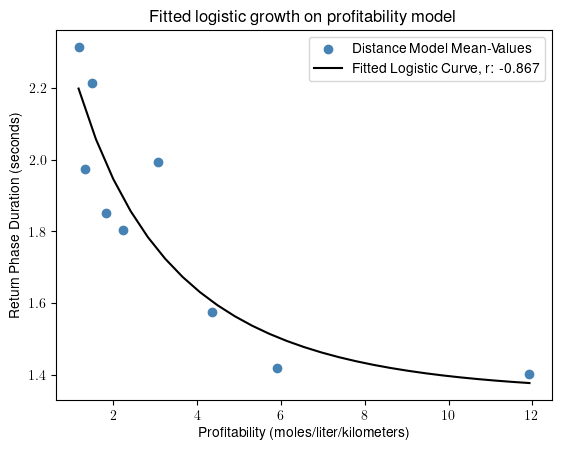

In [57]:
# Adding more datapoints for graph
fit_ret_log_mean_qual = logistic(qual_prof_mean, *param_logist_mean)
fit_ret_log_qual = logistic(qual_prof, *param_logist)

# Plot
ax = plt.axes()

#ax.scatter(profit_model, t_returns, c='darkorange', marker='.', label='Distance Model Values')
ax.scatter(profit_model_mean, t_ret_mean, c='steelblue', marker='o', label='Distance Model Mean-Values')

#ax.plot(qual_prof, fit_ret_log_qual, 'r:', label='Fitted Logistic Curve, r: ' + str(round(r_profit[0],3)))
ax.plot(qual_prof_mean, fit_ret_log_mean_qual, c='k', label='Fitted Logistic Curve, r: ' + str(round(r_profit_mean[0],3)))

# Formatting
ax.set_title(r'Fitted logistic growth on profitability model')
ax.set_xlabel('Profitability (moles/liter/kilometers)')
ax.set_ylabel('Return Phase Duration (seconds)')
ax.legend()

# Showing the plot
plt.show()

<h3>Plotting the derivative of the logistic function</h3>

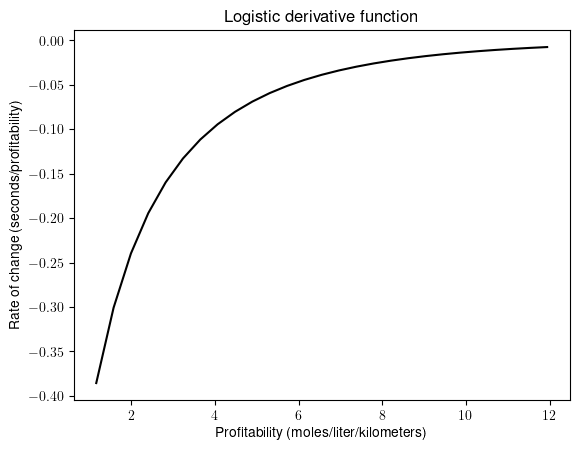

In [58]:
# Adding more datapoints for graph
fit_ret_log_diff_qual = difflogist(qual_prof_mean, *param_logist_mean)

# Plot
ax = plt.axes()

ax.plot(qual_prof_mean, fit_ret_log_diff_qual, c='k')

# Formatting
ax.set_title(r'Logistic derivative function')
ax.set_xlabel('Profitability (moles/liter/kilometers)')
ax.set_ylabel('Rate of change (seconds/profitability)')

# Showing the plot
plt.show()

<h3>Flipping the return phase graph</h3>

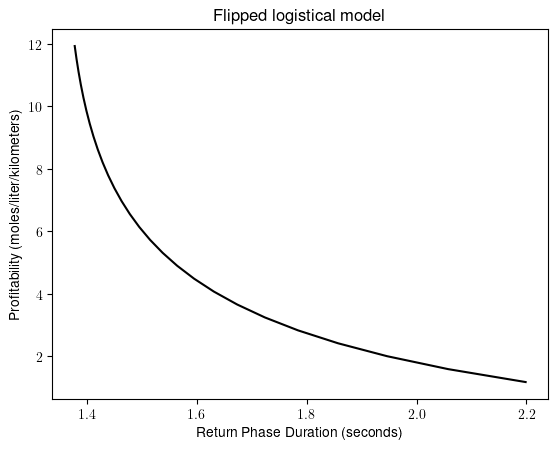

In [59]:
# Adding more datapoints for graph
fit_prof_flip_qual = profbylog(fit_ret_log_mean_qual, *param_logist_mean)

# Plot
ax = plt.axes()

ax.plot(fit_ret_log_mean_qual, fit_prof_flip_qual, c='k')

# Formatting
ax.set_title(r'Flipped logistical model')
ax.set_xlabel('Return Phase Duration (seconds)')
ax.set_ylabel('Profitability (moles/liter/kilometers)')

# Showing the plot
plt.show()

<h3> Differentiating the flipped graph </h3>

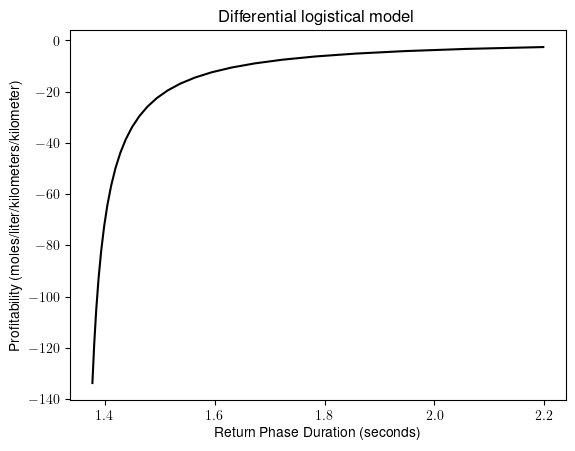

In [60]:
# Adding more datapoints for graph
fit_diff_flip_qual = diffprofbylog(fit_ret_log_mean_qual, *param_logist_mean)

# Plot
ax = plt.axes()

ax.plot(fit_ret_log_mean_qual, fit_diff_flip_qual, c='k')

# Formatting
ax.set_title(r'Differential logistical model')
ax.set_xlabel('Return Phase Duration (seconds)')
ax.set_ylabel('Profitability (moles/liter/kilometers/kilometer)')
#ax.set_ylim(-20,0)

# Showing the plot
plt.show()